# INTRODUCTION

We will determine the best neighborhood in Pittsburgh by looking at the following submetrics

1. Number of smart trash cans installed
2. Number of fire reports per neighborhood
3. Amount of traffic in each neighborhood

Other metrics we will be using are averages and the amount per person.

In [12]:
#Setup
import pandas as pd
pd.set_option('display.max_rows', None)

traffic = pd.read_csv("data/traffic_data.csv", sep=",")
trash = pd.read_csv("data/smart_trash_data.csv", sep=",")
population = pd.read_csv("data/population.csv", sep=",")
fire = pd.read_csv("data/fire_data.csv", sep=",")

### Submetric 1: Cleanliness Innovations
Walking down the streets of South Oakland, there is one thing that you will notice: trash. <br>
You will see trashTrash 
- on the side of the street
- coming out of trash cans
- on people's front yards<br>

__it's everywhere!__


Fortunately, Pittsburgh is trying to decrease the amount of litter throughout the streets by installing smart trash containers. Smart trash containers are trash bins that contain sensors that will report when a bin is full and needs to be emptied. We will look at how many there are in the city, how many there are in each neighborhood, and the percentage of the smart containers that each neighborhood contains. We will then see the neighborhoods that have the most smart trash cans per person who lives there.



In [14]:
# Total number of smart containers
total_count = trash.shape[0]
print(f"There are {total_count} smart containers")

There are 1194 smart containers


The 10 neighborhoods with the most smart trash containers are

In [16]:
neighborhood_counts = trash.groupby('neighborhood').size().reset_index(name='count')
neighborhood_counts.sort_values(by='count', ascending=False).head(10)

,neighborhood,count
57,Shadyside,76
25,East Liberty,68
66,Squirrel Hill South,63
8,Bloomfield,58
48,North Shore,53
61,South Side Flats,51
69,Strip District,42
13,Carrick,38
17,Central Oakland,34
40,Lower Lawrenceville,29


Here are the top 10 neighborhoods by percentage of the trash containers

In [18]:
neighborhood_counts['percentage'] = round((neighborhood_counts['count'] / total_count), 4) * 100
neighborhood_counts.sort_values(by='count', ascending=False).head(10)

,neighborhood,count,percentage
57,Shadyside,76,6.37
25,East Liberty,68,5.70
66,Squirrel Hill South,63,5.28
8,Bloomfield,58,4.86
48,North Shore,53,4.44
61,South Side Flats,51,4.27
69,Strip District,42,3.52
13,Carrick,38,3.18
17,Central Oakland,34,2.85
40,Lower Lawrenceville,29,2.43


In [19]:
neighborhood_counts.sort_values(by='count').head(10)

,neighborhood,count,percentage
78,Windgap,1,0.08
23,East Carnegie,1,0.08
70,Swisshelm Park,1,0.08
5,Bedford Dwellings,1,0.08
67,St. Clair,1,0.08
46,Mt. Oliver,1,0.08
49,Northview Heights,1,0.08
60,South Shore,1,0.08
50,Oakwood,1,0.08
4,Banksville,2,0.17


In [20]:
merged = pd.merge(neighborhood_counts, population, left_on='neighborhood', right_on='Neighborhood', how='inner')

merged['people per container'] = merged['2020_Total_Population']/merged['count']
merged.sort_values(by='people per container')
merged[['neighborhood','count','2020_Total_Population','people per container']].sort_values(by='people per container').head(10)

,neighborhood,count,2020_Total_Population,people per container
16,Chateau,5,19,3.800000
46,North Shore,53,301,5.679245
72,West End,9,205,22.777778
58,South Shore,1,29,29.000000
1,Allegheny West,15,540,36.000000
66,Strip District,42,1845,43.928571
41,Middle Hill,29,1757,60.586207
20,East Allegheny,26,1903,73.192308
35,Larimer,20,1545,77.250000
32,Homewood South,28,2260,80.714286


We can see that Shadyside has 76 containers, which is 6.37% of the overall smart containers installed. We also see that within the top 10, neighborhoods contain anywhere between about 2.5% of the trashcans to around 6.4%. We can also see that the 9 least included neighborhoods only received 1 trashcan each, which is less than .01% of the total number installed. We can see that some neighborhoods have more trash cans per person, meaning that a place like the Strip District or North Shore would be the best option

We will now visualize the data. Using a bar graph, we can see that Shadyside and East Liberty have the most amount of smart trash cans, and the amount per neighborhood decreases at a linear rate.

Text(0.5, 1.0, 'Count of fire reports')

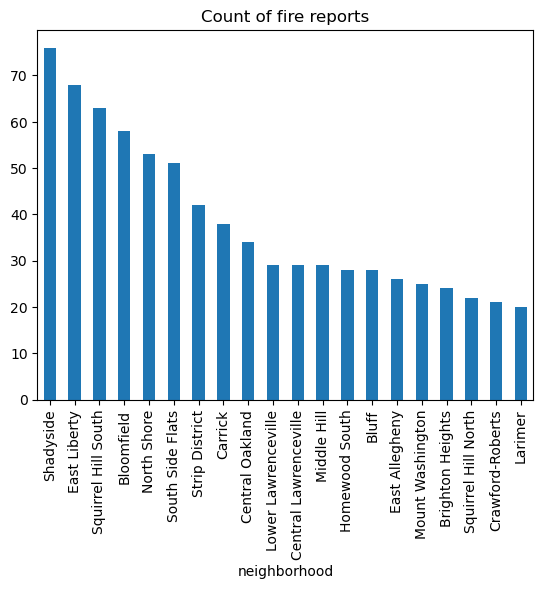

In [23]:
import matplotlib.pyplot as plt
plotted = neighborhood_counts.sort_values(by='count', ascending=False).head(20)

plotted.plot(kind='bar', x='neighborhood', y='count', legend=False)
plt.title("Count of fire reports")

### Submetric 1 Conclusion

We can conclude that of the almost 1200 smart containers installed by Pittsburgh, they are not evenly distributed throughout the city. Shadyside, East Liberty, and Squirrel Hill received the most amount of trash cans, so hopefully they will have the least amount of litter in teh future. However, we can see that the North Shore and West End are two of the neighborhoods with the a population greater than 100 with the most trash cans per person.

### Submetric 2: Fire Safety
If there's one thing I don't want to do its light on fire. We will look at recent fire statistics to measure where the most amount of fire related emergency responses are made.

In [26]:
fire['alarm_time'] = pd.to_datetime(fire['alarm_time'])
lowest_date = fire['alarm_time'].min()
highest_date = fire['alarm_time'].max()
print(f"Our start date is {lowest_date}")
print(f"Our end date is {highest_date}")

Our start date is 2013-01-02 23:34:05
Our end date is 2024-11-01 21:03:43


In [27]:
# Total number of smart containers
total_count = fire.shape[0]
print(f"There were {total_count} fire calls")

There were 10208 fire calls


In [28]:
neighborhood_counts = fire.groupby('neighborhood').size().reset_index(name='count')
neighborhood_counts.sort_values(by='count', ascending=False).head(10)

,neighborhood,count
15,Carrick,307
16,Central Business District,289
72,South Side Flats,288
77,Squirrel Hill South,267
38,Hazelwood,257
53,Mount Washington,231
28,East Liberty,220
13,Brookline,203
41,Homewood South,202
46,Lincoln-Lemington-Belmar,199


In [29]:
neighborhood_counts.sort_values(by='count').head(10)

,neighborhood,count
52,Mount Oliver Borough,6
66,Regent Square,9
26,East Carnegie,11
67,Ridgemont,12
54,Mt. Oliver,12
59,Oakwood,13
4,Arlington Heights,13
78,St. Clair,14
82,Swisshelm Park,17
20,Chartiers City,18


In [30]:
neighborhood_counts['percentage'] = round((neighborhood_counts['count'] / total_count), 4) * 100
neighborhood_counts.sort_values(by='count', ascending=False).head(10)

,neighborhood,count,percentage
15,Carrick,307,3.01
16,Central Business District,289,2.83
72,South Side Flats,288,2.82
77,Squirrel Hill South,267,2.62
38,Hazelwood,257,2.52
53,Mount Washington,231,2.26
28,East Liberty,220,2.16
13,Brookline,203,1.99
41,Homewood South,202,1.98
46,Lincoln-Lemington-Belmar,199,1.95


In [31]:
neighborhood_counts.sort_values(by='count').head(10)

,neighborhood,count,percentage
52,Mount Oliver Borough,6,0.06
66,Regent Square,9,0.09
26,East Carnegie,11,0.11
67,Ridgemont,12,0.12
54,Mt. Oliver,12,0.12
59,Oakwood,13,0.13
4,Arlington Heights,13,0.13
78,St. Clair,14,0.14
82,Swisshelm Park,17,0.17
20,Chartiers City,18,0.18


In [32]:
merged = pd.merge(neighborhood_counts, population, left_on='neighborhood', right_on='Neighborhood', how='inner')

merged['fires per person'] = round(merged['count']/merged['2020_Total_Population'], 6)
merged.sort_values(by='fires per person')
merged[['neighborhood','count','2020_Total_Population','fires per person']].sort_values(by='fires per person').head(10)

,neighborhood,count,2020_Total_Population,fires per person
84,Westwood,28,3332,0.008403
62,Regent Square,9,971,0.009269
48,Morningside,35,3252,0.010763
71,Squirrel Hill North,136,11879,0.011449
52,North Oakland,133,10691,0.012440
64,Shadyside,193,15317,0.012600
36,Highland Park,79,6235,0.012670
55,Oakwood,13,1025,0.012683
77,Swisshelm Park,17,1339,0.012696
59,Point Breeze,72,5348,0.013463


We can see that Carrick has 307 fires within the past 10 years, which is 3% of all fire reports. We also see that within the top 10, neighborhoods 2-3 percent of the fire reports. We can also see that the 10 lowest reported neighborhoods had less than .2% of reports. We can see that some neighborhoods have fewer fires per person, so options that are below .02 fires per person would be considered low.

We will now visualize the data. Using a bar graph, we can see that Carrick and Downtown have the most amount of fire reports, and the amount per neighborhood decreases at a fairly exponential rate.

Text(0.5, 1.0, 'Count of fire reports')

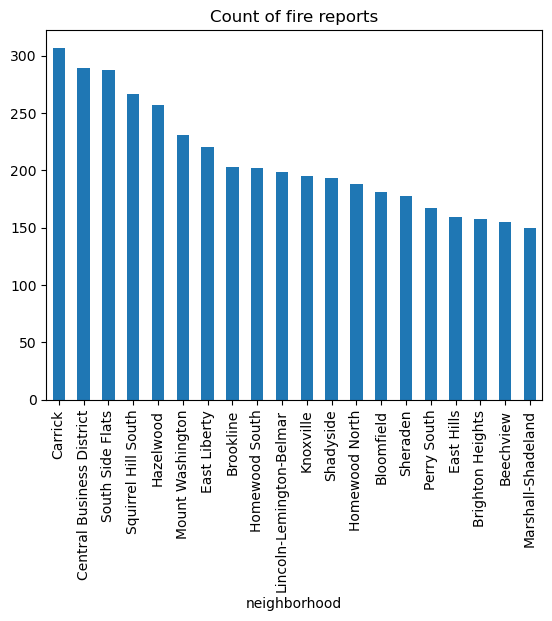

In [63]:
import matplotlib.pyplot as plt
plotted = neighborhood_counts.sort_values(by='count', ascending=False).head(20)

plotted.plot(kind='bar', x='neighborhood', y='count', legend=False)
plt.title("Count of fire reports")

### Submetric 2 Conclusion

We can conclude that neighborhoods like North Oakland, Squirrel Hill North, and Shadyside are some of the most fire safe since they have the lowest amount of fires per person.

### Submetric 3: Traffic

People hate traffic, but also want to be safe by not having drivers that go way faster than the speed limit. Let's see what neighborhoods have the least traffic, as well as which ones have the drivers who drive the lowest percentage over the speed limit. This should help to determine the best neighborhood in terms of traffic, as those that have low traffic and people that don't go far over the speed limit should be the best.

The 10 neighborhoods with the lowest total daily average car traffic are

In [37]:
neighborhood_traffic = traffic.groupby('neighborhood').sum()
neighborhood_traffic.loc[neighborhood_traffic['average_daily_car_traffic'] > 0].sort_values(by='average_daily_car_traffic', ascending=True)['average_daily_car_traffic'].head(10)

neighborhood
South Side Flats             115.0
Lincoln Place                126.0
Lincoln-Lemington-Belmar     195.0
Fineview                     419.0
Allegheny West               477.0
New Homestead                666.0
Overbrook                    777.0
Summer Hill                  937.0
Spring Garden               1226.0
Beltzhoover                 1577.0
Name: average_daily_car_traffic, dtype: float64

The 10 neighborhoods with the lowest percent over the speed limit are

In [39]:
neighborhood_traffic.loc[neighborhood_traffic['percent_over_limit'] > 0].sort_values(by='percent_over_limit', ascending=True)['percent_over_limit'].head(10)

neighborhood
South Side Flats              3.0
Central Business District     6.0
Allegheny West               11.0
Lincoln Place                14.0
Knoxville                    25.0
West Oakland                 28.0
East Allegheny               38.0
New Homestead                39.0
Bluff                        44.0
Fineview                     47.0
Name: percent_over_limit, dtype: float64

The 10 neighborhoods with the lowest recorded max speed are

In [41]:
neighborhood_traffic.loc[neighborhood_traffic['max_speed'] > 0].sort_values(by='max_speed', ascending=True)['max_speed'].head(10)

neighborhood
Spring Hill-City View    25.0
Central Oakland          43.0
New Homestead            44.0
Elliott                  45.0
Lincoln Place            46.0
Perry North              47.0
Sheraden                 48.0
Hazelwood                48.0
Chartiers City           51.0
Upper Hill               53.0
Name: max_speed, dtype: float64

### Submetric 3 Conclusion

Based on the data, we can conclude that the South Side Flats have the least traffic and lowest average percentage over the speed limit, but have a high max speed. Lincoln Place, however, has low numbers in all three of these categories, making it the best neighborhood overall.

# Best Neighborhood to live in: 
According to submetric 1 and 2, the best neighborhood would be either Squirrel Hill or Shadyside. According to submetric 3, the best neighborhood would be South Side falts or Lincoln Place. To choose the best overall neighborhood, we will have to select a neighborhood that isn't the best of any of the metrics, but is high ranking among them. South Side flats ranks decently highly in all three metrics, so we delcare South Side Flats as the best neighborhood.

Tyler Bonte: My favorite neighborhood is Squirrel Hill, as my older brother used to live there, and I thought it was a very cool area to live in. The data says that Squirrel Hill is pretty good, but not the best.<br>
Ben Jupina: My favorite neighborhood is Shadyside since there are many smart trash cans and few fire reports, and the houses are very nice. Unfortunately I wouldn't be able to afford to live there since most of the houses are mansions.